# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
from sympy import *
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [2]:
# описывем функцию
x = Symbol('x')
f = tan(sin(x)+cos(2*x+3))**2
f

tan(sin(x) + cos(2*x + 3))**2

In [3]:
#import sympy as sym

#x = Symbol('x')
#f = tan(sin(x)+cos(2*x+3))**2

print('first derivative в точке 1: ', diff(f).evalf(subs={'x':1}))

first derivative в точке 1:  55.3859176353379


## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

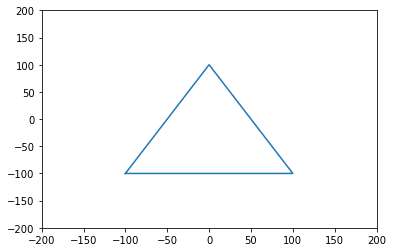

In [4]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(-200.0, 200.0)

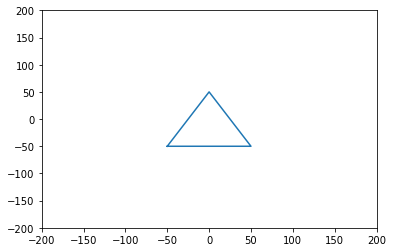

In [5]:
# масштабирование на 0.5
A2 = [[0.5, 0.5, 1],
[0.5, 0.5, 1],
[0.5, 0.5, 1],
[0.5, 0.5, 1]]
A2 = np.array(A2)
i= A*A2
x = i[:,0]
y = i[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(-200.0, 200.0)

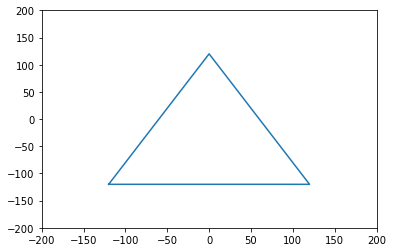

In [6]:
# масштабирование на 1.2
A2 = [[1.2, 1.2, 1],
[1.2, 1.2, 1],
[1.2, 1.2, 1],
[1.2, 1.2, 1]]
A2 = np.array(A2)
i= A*A2
x = i[:,0]
y = i[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(0.0, 400.0)

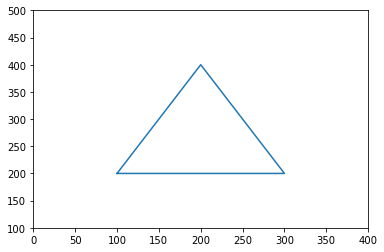

In [7]:
# смещение на 200 по горизонтали и 300 по вертикали
A2 = [[200, 300, 1],
[200, 300, 1],
[200, 300, 1],
[200, 300, 1]]
A2 = np.array(A2)
i= A+A2
x = i[:,0]
y = i[:,1]
plt.plot(x, y)
plt.ylim([100, 500])
plt.xlim([0, 400])

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [8]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [9]:
v,w =np.linalg.eigh(m)

In [10]:
# значения
v

array([0., 2.])

In [11]:
#матрица собственнных векторов
w

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [12]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [13]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

y = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

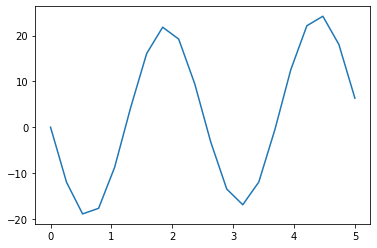

In [14]:
plt.plot(x, y)
plt.show()

In [15]:
def error(params):
    return np.sum(np.abs(y - f(x, params[0], params[1])))

In [16]:
from scipy.optimize import curve_fit
#p, p_cov = curve_fit(f, x, y, p0=[4,4], method = 'trf') 
p, p_cov = curve_fit(f, x, y, method = 'trf') 

p, p_cov


(array([1.6051432 , 1.58606242]),
 array([[ 0.80741618, -0.02752967],
        [-0.02752967,  0.10819338]]))

In [17]:
a, b  = p[0], p[1]
y_fit = np.e**a * np.sin(b*x) + x

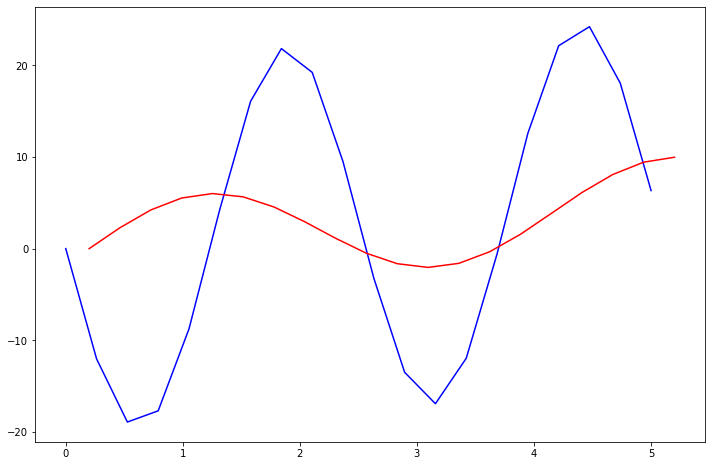

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, color='blue')
# сместим немного график, чтобы сравнить
plt.plot(x+0.2, y_fit, color='red')


In [19]:
# проверяем ошибку
e = error(p)
e

230.4401655559851

[ 3.  -2.5] [[ 2.68953114e-18 -5.23197091e-20]
 [-5.23197091e-20  2.80481703e-19]]
error:  0


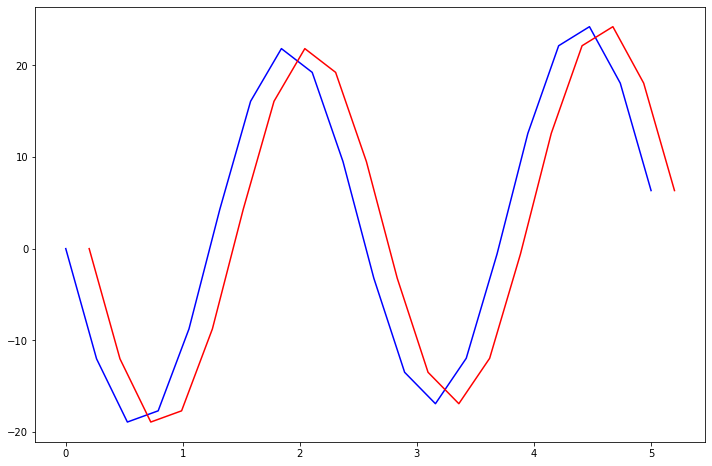

In [20]:
#финал , подбираем p0
from scipy.optimize import curve_fit
p, p_cov = curve_fit(f, x, y, p0=[4,4], method = 'trf') 
print (p, p_cov)
a, b  = p[0], p[1]
y_fit = np.e**a * np.sin(b*x) + x
plt.figure(figsize=(12, 8))
plt.plot(x, y, color='blue')
# сместим немного график, чтобы сравнить
plt.plot(x+0.2, y_fit, color='red')
print ('error: ', round(error(p)))

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [21]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [22]:
for i in range (0,10):
    min = 100
    for j in range (0,10):
        if (i!=j):
            z = np.rad2deg( np.arccos(np.dot(raitings [i],raitings [j])/(np.linalg.norm(raitings [i]) * np.linalg.norm(raitings [j]) )))
            #print ( 'User ', i , ' и User ', j, ': ', z)
            if z < min:
                min =z
                similar = j
    print()
    print ( 'Пользователь ', similar, ' - наиболее похожий пользователь на пользователя ', i, 'косинусная мера :', min)
    print (raitings [i])
    print (raitings[similar])
    print()


Пользователь  8  - наиболее похожий пользователь на пользователя  0 косинусная мера : 24.40330593975743
[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]


Пользователь  4  - наиболее похожий пользователь на пользователя  1 косинусная мера : 29.38053644405199
[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7]
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]


Пользователь  9  - наиболее похожий пользователь на пользователя  2 косинусная мера : 23.25880816485584
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]


Пользователь  9  - наиболее похожий пользователь на пользователя  3 косинусная мера : 30.810203550867165
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]


Пользователь  8  - наиболее похожий пользователь на пользователя  4 косинусная мера : 28.419725938773073
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]


Пользователь